# DECISION TREE

- is another method we can use for finding relationship between target and one or more predictors
- decision trees can be used for both categorical and continous targets (so both classification and regression tasks -  today we'll be focusing on regression trees)
- the main idea is to create a tree of decisions that best partitions the data 
- creating a tree involves deciding on which features to split the data and what conditions to use for splitting, as well as with knowing when to stop


In [1]:
import pandas as pd
import numpy as np
import json
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows",6)

%matplotlib inline

In [2]:
df_data = pd.read_csv(r'./aps/notebooks/ml_varsom/varsom_ml_preproc.csv', index_col=0)

target_ = 'danger_level'
X = df_data.drop([target_, 'date_valid'], axis=1)
y = df_data.filter([target_], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 222, test_size = 0.3)

In [4]:
print(df_data.columns)
df_data.describe()

Index(['avalanche_problem_1_cause_id',
       'avalanche_problem_1_destructive_size_ext_id',
       'avalanche_problem_1_distribution_id',
       'avalanche_problem_1_exposed_height_1',
       'avalanche_problem_1_exposed_height_2', 'avalanche_problem_1_ext_id',
       'avalanche_problem_1_probability_id', 'avalanche_problem_1_problem_id',
       'avalanche_problem_1_problem_type_id',
       'avalanche_problem_1_trigger_simple_id', 'avalanche_problem_1_type_id',
       'avalanche_problem_2_cause_id',
       'avalanche_problem_2_destructive_size_ext_id',
       'avalanche_problem_2_distribution_id',
       'avalanche_problem_2_exposed_height_1',
       'avalanche_problem_2_exposed_height_2', 'avalanche_problem_2_ext_id',
       'avalanche_problem_2_probability_id', 'avalanche_problem_2_problem_id',
       'avalanche_problem_2_problem_type_id',
       'avalanche_problem_2_trigger_simple_id', 'avalanche_problem_2_type_id',
       'avalanche_problem_3_cause_id',
       'avalanche_problem_3

,avalanche_problem_1_cause_id,avalanche_problem_1_destructive_size_ext_id,avalanche_problem_1_distribution_id,avalanche_problem_1_exposed_height_1,avalanche_problem_1_exposed_height_2,avalanche_problem_1_ext_id,avalanche_problem_1_probability_id,avalanche_problem_1_problem_id,avalanche_problem_1_problem_type_id,avalanche_problem_1_trigger_simple_id,...,author_torolav@obskorps,mountain_weather_wind_direction_E,mountain_weather_wind_direction_N,mountain_weather_wind_direction_NE,mountain_weather_wind_direction_NW,mountain_weather_wind_direction_None,mountain_weather_wind_direction_S,mountain_weather_wind_direction_SE,mountain_weather_wind_direction_SW,mountain_weather_wind_direction_W
count,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,...,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000
mean,14.857928,2.159864,1.805338,617.870225,62.611198,19.344584,3.019885,0.997907,14.845631,18.843276,...,0.040555,0.100471,0.033229,0.052329,0.066457,0.019362,0.118786,0.315542,0.170591,0.123234
std,5.313807,0.671965,0.565790,355.952656,197.157994,2.513152,0.376101,0.045709,11.530338,4.701593,...,0.197282,0.300666,0.179257,0.222718,0.249112,0.137810,0.323579,0.464792,0.376201,0.328749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50%,13.000000,2.000000,2.000000,600.000000,0.000000,20.000000,3.000000,1.000000,10.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,3.000000,2.000000,900.000000,0.000000,20.000000,3.000000,1.000000,30.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,24.000000,4.000000,3.000000,2100.000000,2000.000000,25.000000,5.000000,1.000000,50.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print(df_data[df_data['danger_level']>3]['region_id'].unique())

[3034 3022 3023 3024 3027 3029 3031 3012 3014 3015 3016 3017 3003 3007
 3009 3010 3011 3013]



# RANDOM FORESTS

- are using Bagging (bootstrap aggregating) algorithm

- **bagging** is an ensemble learning where we build each model using the same algorithm, but we train each learner on different set of data


# GRADIENT BOOSTED TREES

- are using Boosting (Ada Boost) algorithm

- **boosting** is a variation of ensemble trees that strives to improve the learners by focusing on areas where the system is not performing well.



### We can start by creating one decision tree of depth 3 using all features 

In [10]:
dec_tree = tree.DecisionTreeRegressor(random_state=222, max_depth = 3)

dec_tree.fit(X_train, y_train) # we're using the same data as in last linear model

predictions_dt = dec_tree.predict(X_test)
print(predictions_dt.shape, y_test.shape)

(1147,) (1147, 1)


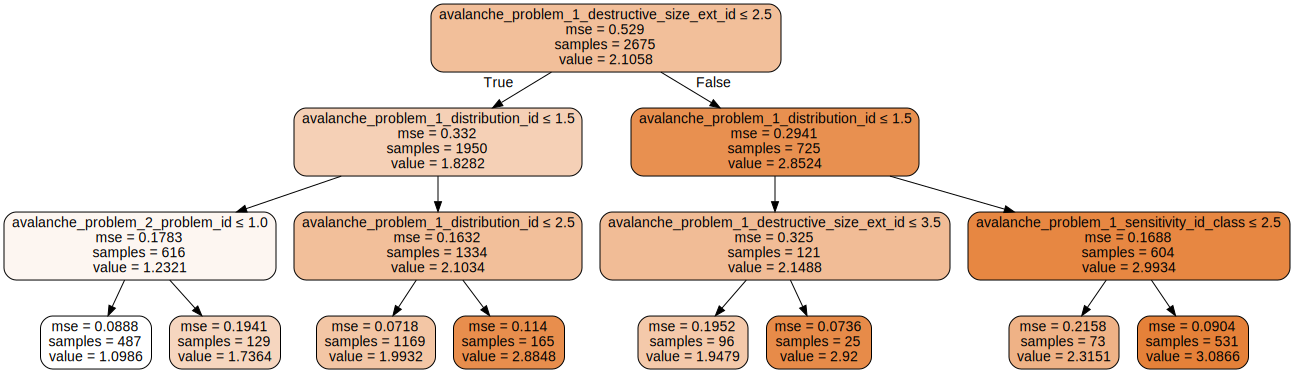

In [12]:
# Visualize the tree
dot_data = tree.export_graphviz(dec_tree, out_file=None, 
                         feature_names=df_data.drop([target_, 'date_valid'], axis=1).columns,   
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data) 
graph.render('aval_danger_by_problem_dt_lev7')
graph 

The first avalanche problem dictates the danger level - that was expected :-)



We need to evaluate our model:

In [13]:
print('Decision tree R^2: %.4f' % dec_tree.score(X_test, y_test)) 

Decision tree R^2: 0.8358


Text(0,0.5,'$R^2$')

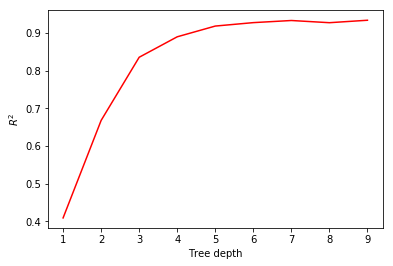

In [14]:
depths = range(1, 10)

tree_models = [tree.DecisionTreeRegressor(random_state=222, max_depth=d).fit(X_train, y_train) for d in depths]
tree_Rsquare = [f.score(X_test, y_test) for f in tree_models]

plt.plot(depths, tree_Rsquare, color = 'red')
plt.xlabel('Tree depth')
plt.ylabel('$R^2$')

Looks like there is little gain when using a depth > 7.

In [15]:
# so let's create a tree with depth = 7

dec_tree = tree.DecisionTreeRegressor(random_state=222, max_depth = 7)

dec_tree.fit(X_train, y_train) # we're using the same data as in last linear model

predictions_dt = dec_tree.predict(X_test)

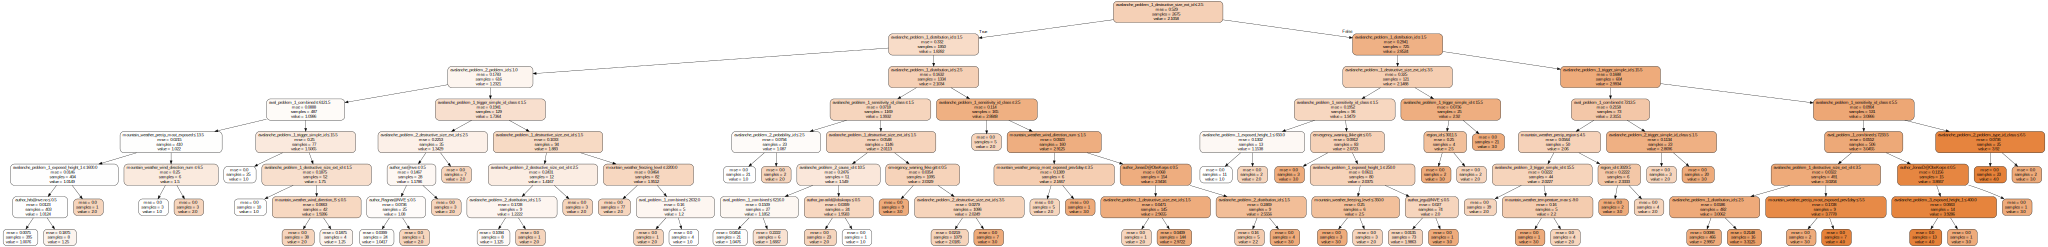

In [16]:
# Visualize the tree
dot_data = tree.export_graphviz(dec_tree, out_file=None, 
                         feature_names=df_data.drop([target_, 'date_valid'], axis=1).columns,   
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data) 
graph.render('aval_danger_by_problem_dt2')
graph 

In [17]:
print('Decision tree R^2: %.4f' % dec_tree.score(X_test, y_test)) 

Decision tree R^2: 0.9334


Now we see slight improvement in $R^{2}$.

Maybe we'll get better results with **random forests** and/or **gradient boosted trees**. 

### Random forest 

In [18]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 422, max_depth = 7)
forest_reg.fit(X_train, y_train)

predictions_rf = forest_reg.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [19]:
print('Random forest R^2: %.4f' % forest_reg.score(X_test, y_test)) 

Random forest R^2: 0.9428


### Gradient boosting

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(random_state = 222, max_depth = 6)

grad_boost.fit(X_train, y_train)

predictions_gb = grad_boost.predict(X_test)

print('Gradient boosted tree R^2: %.4f' % grad_boost.score(X_test, y_test)) 

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient boosted tree R^2: 0.9611


Again, very small difference between random forests and boosted trees.


Last thing we can check is imprtance of variables - if some of the feature are not as useful as the other in explaining the variability in our target variable, we cn exclude them in order to simplify our model. 

In [21]:
feature_labels = np.array(df_data.drop([target_, 'date_valid'], axis=1).columns)
#feature_labels = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
importance = forest_reg.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

author_Ragnar@NVE-0.00%
author_Halvor@NVE-0.00%
author_Andreas@nve-0.00%
region_type_id-0.00%
author_John Smits-0.00%
avalanche_problem_3_problem_id-0.00%
avalanche_problem_3_probability_id-0.00%
author_Jørgen@obskorps-0.00%
avalanche_problem_3_exposed_height_2-0.00%
author_Karsten@NVE-0.00%
region_group_id-0.00%
avalanche_problem_3_sensitivity_id_class-0.00%
author_Tommy@NVE-0.00%
avalanche_problem_2_problem_id-0.00%
avalanche_problem_2_ext_id-0.00%
author_anitaaw@met-0.00%
avalanche_problem_1_problem_id-0.00%
mountain_weather_wind_direction_SE-0.00%
mountain_weather_wind_direction_None-0.00%
mountain_weather_wind_direction_NW-0.00%
author_haso@nve.no-0.00%
author_torolav@obskorps-0.00%
avalanche_problem_1_type_id-0.00%
author_Espen Granan-0.00%
author_torehum@svv-0.00%
mountain_weather_wind_direction_NE-0.00%
author_EspenN-0.00%
avalanche_problem_3_destructive_size_ext_id-0.00%
avalanche_problem_3_type_id-0.01%
author_Ingrid@NVE-0.01%
avalanche_problem_1_ext_id-0.01%
author_knutinge@

In [22]:
# excluding the variables where impotance is less than 1%

X = df_data[['avalanche_problem_1_distribution_id',
             'avalanche_problem_1_destructive_size_ext_id',
             'avalanche_problem_1_trigger_simple_id',
             'avalanche_problem_1_probability_id',
             'avalanche_problem_2_destructive_size_ext_id',
             'avalanche_problem_2_probability_id']]
y = df_data['danger_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 222)

In [23]:
grad_boost = GradientBoostingRegressor(random_state = 222, max_depth = 7)

grad_boost.fit(X_train, y_train)

predictions_gb = grad_boost.predict(X_test)

In [24]:
print('Gradient boosted tree R^2: %.4f' % grad_boost.score(X_test, y_test)) 

Gradient boosted tree R^2: 0.9409
